<a href="https://colab.research.google.com/github/alirezakhodabakhsh/Tensorflow1.XX-Tutorial/blob/main/Tensorflow_1_XX_Toturial_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===================================================================
# **TENSORFLOW 1.XX  TOTURIAL - Example**
* This notebook implement MLP network on MNIST datasets!
* Written by **Alireza Khodabakhsh**
* alireza.khodabakhsh@ee.sharif.edu
* Aban 1400, October 2021
# ===================================================================

# 1. import library

In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import math
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


# 2. import Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

# 3. Train/Test/Valid & One Hot

In [3]:
num_test=x_test.shape[0]
num_valid=int(0.3*x_train.shape[0])
num_train=x_train.shape[0]-num_valid

x_valid=x_train[num_train:]
y_valid=y_train[num_train:]

x_train=x_train[0:num_train]
y_train=y_train[0:num_train]

y_train_hot=tf.Session().run(tf.one_hot(y_train,10))
y_valid_hot=tf.Session().run(tf.one_hot(y_valid,10))
y_test_hot=tf.Session().run(tf.one_hot(y_test,10))
tf.Session().close()

# 4. Shuffle

In [4]:
x_train_shaffle=tf.Session().run(tf.random.shuffle(x_train, seed=12321 ))
y_train_shaffle=tf.Session().run(tf.random.shuffle(y_train_hot, seed=12321))

# 5. HyperParameters

In [5]:
[height,weight]=x_train.shape[1:]
num_class=10
rl=0.001
batchsize=128
normal_std=0.001
hidden_num=256
num_epoch=20

# 6. Functions that we'll need

In [6]:
def WEIGHTS(shape, name) :
    return tf.get_variable(dtype=tf.float32, shape=shape,name='W_'+name,
                  initializer=tf.truncated_normal_initializer(stddev=0.001))

In [7]:
def BIAS (shape, name):
    return tf.get_variable(dtype=tf.float32, shape=(shape) , name='B_'+name,
                  initializer=tf.zeros_initializer())

In [8]:
def FC(X, num_units, name, relu=False):
    in_dim=X.get_shape()[1]
    W=WEIGHTS((in_dim, num_units), name)
    B=BIAS ((num_units), name)
    H=tf.matmul(X,W)
    O=tf.add(H,B)
    if relu==True:
        return tf.nn.relu(O)
    return O

# 7. Neural Network ( Graph Phase )

In [9]:
tf.reset_default_graph()

input_image=tf.placeholder(dtype=tf.float32, shape=(None, weight, height),
                           name='INPUT')

#input_image_norm=tf.image.per_image_standardization(input_image)

x_flatten=tf.layers.flatten(input_image)

FC1=FC(x_flatten, hidden_num, 'FC1', relu=True)

H2=FC(FC1, 10, 'FC2', relu=False)


output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                            name='OUTPUT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


# 8. Neural Network ( Graph Phase ) - Optimization 

In [10]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= H2,
                                            name='LOSS'))
adam=tf.train.GradientDescentOptimizer (
    learning_rate=rl, name='Adam'
).minimize(loss)
accuracy=tf.math.reduce_mean(tf.cast(tf.equal(tf.math.argmax(H2, axis=1),tf.math.argmax(output_image, axis=1)), dtype='float32'))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



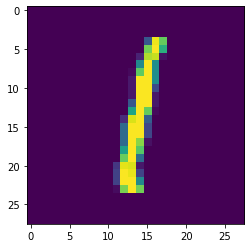

In [11]:
plt.imshow(x_valid[0])

# 9. Neural Network ( Session Phase )  

In [12]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(1,num_epoch+1):
    print('==================================================')
    print('====== Epoch=%s =================================== ' %(epoch))
    print('==================================================')
    for i in range(math.floor(num_train/batchsize)):
        f_train={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
                  output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam, feed_dict=f_train)
        if i%100==0:
          L,A=sess.run([loss, accuracy], feed_dict=f_train)
          print('iter {}: \t Loss={:.2f} \t Accuracy:%{:.2f}'.format(i, L, A*100))
          
    f_valid={input_image:x_valid , 
              output_image:y_valid_hot}
    L,A=sess.run([loss, accuracy], feed_dict=f_valid)
    print('--------------------------------------------------')
    print('Epoch:{} \t Loss_Valid:{:.2f} \t Accuracy_Valid:%{:.2f}'.format(epoch, L, A*100))
    print('--------------------------------------------------')

====== Epoch=1 =================================== 
iter 0: 	 Loss=2.29 	 Accuracy:%41.41
iter 100: 	 Loss=0.28 	 Accuracy:%94.53
iter 200: 	 Loss=0.29 	 Accuracy:%89.06
iter 300: 	 Loss=0.16 	 Accuracy:%96.88
--------------------------------------------------
Epoch:1 	 Loss_Valid:0.28 	 Accuracy_Valid:%91.95
--------------------------------------------------
====== Epoch=2 =================================== 
iter 0: 	 Loss=0.17 	 Accuracy:%96.09
iter 100: 	 Loss=0.13 	 Accuracy:%96.88
iter 200: 	 Loss=0.19 	 Accuracy:%93.75
iter 300: 	 Loss=0.10 	 Accuracy:%98.44
--------------------------------------------------
Epoch:2 	 Loss_Valid:0.21 	 Accuracy_Valid:%94.19
--------------------------------------------------
====== Epoch=3 =================================== 
iter 0: 	 Loss=0.11 	 Accuracy:%96.88
iter 100: 	 Loss=0.08 	 Accuracy:%97.66
iter 200: 	 Loss=0.13 	 Accuracy:%99.22
iter 300: 	 Loss=0.07 	 Accuracy:%98.44
--------------------------------------------------
Epoch:3 	 Loss_

# =======================================================================
# **THANKS** 
# =======================================================================

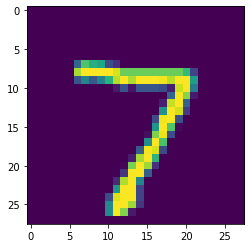

In [13]:
plt.imshow(x_test[0])

In [14]:
x_test[0].max()

255

In [15]:
(sess.run(FC1, feed_dict={input_image : x_test[0:1]})).shape

(1, 256)

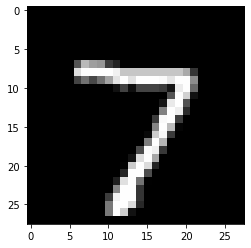

In [22]:
plt.imshow(x_test[0], cmap='gray', vmin=0, vmax=255)
plt.show()

In [36]:
np.argwhere(x_test[0]==0).shape[0] # number of zeros

668

In [38]:
np.sum(x_test[0]) #intensity 

18454

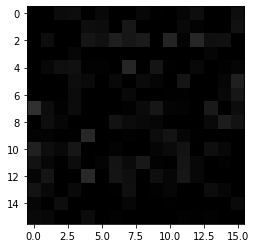

In [31]:
O=((sess.run(FC1, feed_dict={input_image : x_test[0:1]})).reshape((16,16)))

plt.imshow(O, cmap='gray', vmin=0, vmax=255)
plt.show()

In [37]:
np.argwhere(O==0).shape[0] # number of zeros

111

In [39]:
np.sum(O)

1634.1288